In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
def get_age_bins(df, column_name):
    min_age = int(df[column_name].min() - 1)
    max_age = int(df[column_name].max() + 1)

    return range(min_age, max_age, 1)

# UKB

In [5]:
UKB = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/ukb_ses2_joel.csv")
UKB

,participant_id,Sex,Age when attended assessment centre
0,3411469,1,65.0
1,2290292,0,69.0
2,3842391,0,70.0
3,2758537,1,49.0
4,4334619,1,70.0
...,...,...,...
42781,5057890,1,72.0
42782,2038574,1,70.0
42783,1415693,0,64.0
42784,4524619,1,66.0


Sex
0    22578
1    20208
Name: participant_id, dtype: int64
44.0 82.0
63.9704342541953 7.693071512019081


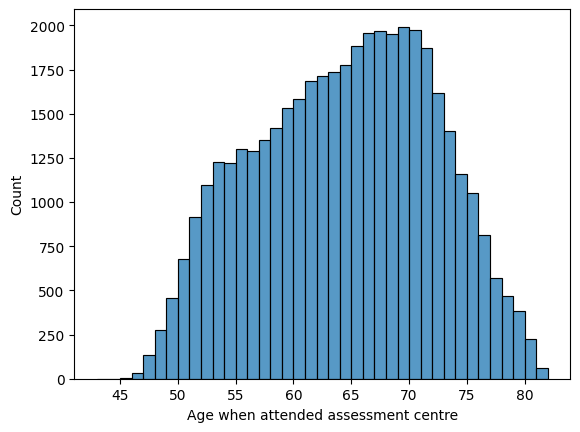

In [66]:
print(UKB.groupby("Sex").count().participant_id)

bins = get_age_bins(UKB, "Age when attended assessment centre")

sns.histplot(UKB, x="Age when attended assessment centre", bins=bins)

print(UKB["Age when attended assessment centre"].min(), UKB["Age when attended assessment centre"].max())
print(UKB["Age when attended assessment centre"].mean(), UKB["Age when attended assessment centre"].std())

In [57]:
20208/(20208+22578)

0.47230402468097044

# HCP

In [18]:
HCP = pd.read_csv("/neurospin/dico/data/deep_folding/papers/miccai2023/Input/csv/hcp/participants.csv")
HCP

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,992774,Q2,Q02,M,31-35,True,2,2,4,100.0,...,8.4,122.25,111.41,4.0,50.1,107.17,103.55,1.76,0.0,1.76
1202,993675,S900,Q09,F,26-30,True,2,2,4,100.0,...,0.4,122.25,110.45,0.0,38.6,84.07,84.25,1.80,1.0,1.76
1203,994273,S500,Q06,M,26-30,True,1,1,4,100.0,...,6.0,122.25,111.41,7.0,63.8,110.65,109.73,1.80,1.0,1.76
1204,995174,S1200,Q13,M,22-25,False,1,1,2,0.0,...,3.6,88.61,64.58,3.0,50.1,117.16,117.40,1.80,0.0,1.80


In [20]:
print(HCP.groupby("Gender").count().Subject)
print(HCP.groupby("Age").count().Subject)

Gender
F    656
M    550
Name: Subject, dtype: int64
Age
22-25    247
26-30    527
31-35    418
36+       14
Name: Subject, dtype: int64


In [62]:
(40+22)/2

31.0

5.196152422706632

In [59]:
mu = (23.5*247 + 28*527 + 33*418 + 38*14)/(1206)

var = (23)

28.927446102819236

# ACCpatterns

In [72]:
ACC = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/subjects_labels.csv', index_col=0)
ACC

print("INCOMPLETE FOR THE RELEVANT INFORMATION (AGE, SEX)")

INCOMPLETE FOR THE RELEVANT INFORMATION (AGE, SEX)


In [55]:
print(ACC.groupby("Right_PCS").count().DATABASE)
print(ACC.groupby("SEX").count().DATABASE)

Right_PCS
absent     229
present    152
Name: DATABASE, dtype: int64
SEX
F    116
M    161
Name: DATABASE, dtype: int64


In [56]:
161/(161+116)

0.5812274368231047

## Tissier

In [31]:
tissier = pd.read_csv('/neurospin/dico/data/bv_databases/human/partially_labeled/ACCpatterns/all_tissier_2018_80_subjects.csv')
tissier

,Unnamed: 0,DATABASE,Sujet,long_name,Left_PCS,Right_PCS,Age,Groupe,GroupeNew,Sexe,...,Inc-coul,TMTA,TMTB,Flex,right_3level,left_2level,right_2level,Asym3_from2,Asym3_from3,Asym2_from2
0,0,TISSIER_2018,e0058,e0058_t1_s03,present,present,9.460274,1-enfant,1-EnfantAdo,F,...,49.10,26.50,44.60,18.10,present,present,present,Sym,Sym,Sym
1,1,TISSIER_2018,e0059,e0059_t1_s03,present,present,9.460274,1-enfant,1-EnfantAdo,M,...,58.00,22.80,44.70,21.90,proeminent,present,present,Sym,Sym,Sym
2,2,TISSIER_2018,e0048,e0048_t1_s03,present,absent,9.526027,1-enfant,1-EnfantAdo,F,...,18.60,16.70,52.60,35.90,absent,present,absent,Asym_left,Asym_left,Asym
3,3,TISSIER_2018,e0053,e0053_t1_s03,absent,present,9.690411,1-enfant,1-EnfantAdo,M,...,41.30,31.70,59.50,27.80,proeminent,absent,present,Asym_right,Asym_right,Asym
4,4,TISSIER_2018,e0061,e0061_t1_s03,absent,present,9.819178,1-enfant,1-EnfantAdo,M,...,16.98,24.91,34.69,9.78,present,absent,present,Asym_right,Asym_right,Asym
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,TISSIER_2018,a0005,a0005_t1_s03,absent,present,34.720548,3-Adulte,3-Adulte,M,...,20.60,15.96,23.51,7.55,present,absent,present,Asym_right,Asym_right,Asym
76,76,TISSIER_2018,a0006,a0006_t1_s03,present,absent,34.753425,3-Adulte,3-Adulte,M,...,24.57,10.71,13.77,3.06,absent,present,absent,Asym_left,Asym_left,Asym
77,77,TISSIER_2018,a0001,a0001_t1_s03,present,present,36.224658,3-Adulte,3-Adulte,M,...,18.40,12.86,21.14,8.28,proeminent,present,present,Sym,Sym,Sym
78,78,TISSIER_2018,a0016,a0016_t1_s03,absent,present,37.101370,3-Adulte,3-Adulte,F,...,37.87,10.62,27.61,16.99,present,absent,present,Asym_right,Asym_right,Asym


In [67]:
print(tissier.groupby("Sexe").count().Sujet)

print(tissier.Age.mean())

Sexe
F    40
M    40
Name: Sujet, dtype: int64
18.837945205375


In [70]:
# Second mean is calculated on the excel file for NIMH

(tissier.Age.mean()*80 + 14.0234010152284*197)/(80+197)


15.413883091805033

## NIMH

In [71]:
NIMH_nv = pd.read_csv("/neurospin/dico/data/bv_databases/human/partially_labeled/ACCpatterns/all_nimh_nv.csv", index_col=0)
NIMH_cos = pd.read_csv("/neurospin/dico/data/bv_databases/human/partially_labeled/ACCpatterns/all_nimh_cos.csv", index_col=0)
NIMH_cossib = pd.read_csv("/neurospin/dico/data/bv_databases/human/partially_labeled/ACCpatterns/all_nimh_cossib.csv", index_col=0)

NIMH = pd.concat([NIMH_nv, NIMH_cos, NIMH_cossib], axis=0)
#NIMH.astype({'AGESCAN0': 'float', 'AGESCAN1': 'float'}).dtypes
NIMH

,PERSON_ID,DATABASE,SEX,HAND,IRM_NAME0,IRM_NAME1,long_name,Left_PCS,Right_PCS,AGESCAN0,...,JUDGMENT (L)0,JUDGMENT (L)1,PCS_R0,PCS_R1,PCS_R_num3_0,PCS_R_num3_1,PCS_R_num1_0,PCS_R_num1_1,JUDGMENT (R)0,JUDGMENT (R)1
0,18504828,NIMH_NV,M,R,nih_chp_00080,nih_chp_00901,nih_chp_00901_t1,present,present,"14,04",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19162407,NIMH_NV,M,R,nih_chp_00175,nih_chp_00874,nih_chp_00874_t1,absent,present,"12,73",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23422078,NIMH_NV,M,R,nih_chp_00957,nih_chp_04657,nih_chp_04657_t1,absent,absent,"15,13",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28791611,NIMH_NV,F,R,nih_chp_01021,nih_chp_04195,nih_chp_04195_t1,present,absent,"16,49",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28925004,NIMH_NV,M,R,nih_chp_00915,nih_chp_01363,nih_chp_01363_t1,present,present,"18,65",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,55629877,NIMH_COSSIB,M,R,nih_chp_04551,nih_chp_05116,nih_chp_05116_t1,absent,absent,"16,85",...,1.0,1.0,abs,abs,0.0,0.0,0.0,0.0,1.0,1.0
45,55848628,NIMH_COSSIB,F,R,nih_chp_04593,nih_chp_05147,nih_chp_05147_t1,absent,present,"16,62",...,1.0,1.0,pre,pre,1.0,1.0,1.0,1.0,1.0,1.0
46,55848797,NIMH_COSSIB,F,R,nih_chp_04592,nih_chp_05032,nih_chp_05032_t1,absent,absent,"19,55",...,1.0,1.0,abs,abs,0.0,0.0,0.0,0.0,1.0,1.0
47,56216125,NIMH_COSSIB,M,R,nih_chp_04626,nih_chp_05190,nih_chp_05190_t1,absent,absent,"8,6",...,0.0,0.0,abs,abs,0.0,0.0,0.0,0.0,1.0,1.0


In [50]:
NIMH.AGESCAN0.dtype

dtype('O')

In [49]:
bins0 = get_age_bins(NIMH, "AGESCAN0")
sns.histplot(NIMH, x="AGESCAN0", bins=bins0)

plt.figure()

bins1 = get_age_bins(NIMH, "AGESCAN1")
sns.histplot(NIMH, x="AGESCAN1", bins=bins1)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [41]:
print(NIMH.groupby("SEX").count().PERSON_ID)

SEX
F     76
M    121
Name: PERSON_ID, dtype: int64


## Apex

In [52]:
apex = pd.read_csv("/neurospin/dico/data/bv_databases/human/partially_labeled/ACCpatterns/all_apex.csv")
apex

,Unnamed: 0,Sujet,DATABASE,name,long_name,Left_PCS,Right_PCS,Stroop,Unnamed: 8,LQC,RQC,Asym2,Asym3
0,0,1,APEX,active01,sub-active01_ses-pretraining_T1w,absent,present,50,69642857.0,100.0,100.0,Asym,Asym_R
1,1,2,APEX,inhibition01,sub-inhibition01_ses-pretraining_T1w,absent,present,126,1794872.0,100.0,100.0,Asym,Asym_R
2,2,3,APEX,inhibition02,sub-inhibition02_ses-pretraining_T1w,absent,present,16,59615385.0,100.0,100.0,Asym,Asym_R
3,3,4,APEX,active02,sub-active02_ses-pretraining_T1w,absent,absent,-4,196969697.0,100.0,100.0,Sym,Sym
4,4,5,APEX,inhibition04,sub-inhibition04_ses-pretraining_T1w,present,absent,162,192308.0,100.0,100.0,Asym,Asym_L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,235,APEX,35DERHU,NaN,present,absent,506,4545455.0,50.0,50.0,Asym,Asym_L
100,100,238,APEX,38BESMA,NaN,absent,absent,130,5166667.0,100.0,100.0,Sym,Sym
101,101,239,APEX,39TIMNI,NaN,present,present,-34,16190476.0,100.0,100.0,Sym,Sym
102,102,240,APEX,40JEAOL,NaN,absent,absent,132,NaN,100.0,100.0,Sym,Sym
